---

<h1 style="text-align: center; font-size: 30px;">House Price Prediction </h1>


---

*Done by: Vishnu C Devan*

### Introduction to Data and Problem Statement

#### Dataset Overview:
The dataset provides housing price information for Bengaluru city, including additional features for enhanced analysis. Three datasets are provided:  
1. **train.csv:** Contains detailed property features such as area type, location, size, total area, number of bathrooms and balconies, and price (target variable).  
2. **avg_rent.csv:** Includes the average rent for a 2BHK flat in different locations.  
3. **dist_from_city_centre.csv:** Details the distance of each location from the city center.

The `test.csv` dataset contains the same features as `train.csv`, excluding the target variable `price`, which needs to be predicted.

#### Objective of the Analysis:
The primary goal is to develop a predictive model to estimate housing prices in Bengaluru using the available datasets. Additionally, we aim to explore feature relationships and enhance prediction accuracy through data enrichment and feature engineering.

#### Key Features:
- **train.csv:**
  - `area_type`: The type of area for the property (e.g., built-up area, plot area).
  - `availability`: The date or status of property availability.
  - `location`: The locality within Bengaluru.
  - `size`: The size of the property in terms of BHK/bedrooms.
  - `society`: Encrypted apartment or society name.
  - `total_sqft`: Total area of the property.
  - `bath`: Number of bathrooms.
  - `balcony`: Number of balconies.
  - `price`: Target variable representing the property price in Lakhs.

- **avg_rent.csv:**
  - `location`: Locality within Bengaluru.
  - `avg_2bhk_rent`: Average rent of a 2BHK flat in that location.

- **dist_from_city_centre.csv:**
  - `location`: Locality within Bengaluru.
  - `dist_from_city`: Distance of thearket based on pricing and other features?


### Data Acquisition

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Load primary dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Load secondary datasets
avg_rent = pd.read_csv('avg_rent.csv')
dist_from_city = pd.read_csv('dist_from_city_centre.csv')

In [ ]:
train.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
test.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony
0,0,Super built-up Area,Ready To Move,Chamrajpet,2 BHK,NaN,650,1.0,1.0
1,1,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,SrncyRe,1370,2.0,1.0
2,2,Super built-up Area,Ready To Move,Whitefield,3 BHK,AjhalNa,1725,3.0,2.0
3,3,Built-up Area,Ready To Move,Jalahalli,2 BHK,NaN,1000,2.0,0.0
4,4,Plot Area,Ready To Move,TC Palaya,1 Bedroom,NaN,1350,1.0,0.0


In [ ]:
avg_rent.head()

,location,avg_2bhk_rent
0,Krishnarajapura,11954
1,Sarjapur,45000
2,Whitefield Hope Farm Junction,26370
3,Devanahalli,17302
4,Whitefield,14981


In [ ]:
dist_from_city.head()

,location,dist_from_city
0,Whitefield,17.3
1,Sarjapur Road,17.2
2,Electronic City,18.1
3,Kanakpura Road,26.5
4,Thanisandra,11.5


#### 1. Merging Secondary Datasets:
To enhance the training and testing datasets, additional data from the external reference datasets (`avg_rent.csv` and `dist_from_city_centre.csv`) were merged with the primary datasets (`train.csv` and `test.csv`). The merge was performed on the `location` column to bring in additional features, such as the average rent of a 2BHK in that location and the distance from the city center.

In [ ]:
# Merge secondary datasets
train = train.merge(avg_rent, on='location', how='left')
train = train.merge(dist_from_city, on='location', how='left')

train.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,11500.0,19.3
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,NaN,34.6
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,19750.0,12.9
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,NaN,21.4
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,16375.0,11.8


In [ ]:
# Merge secondary datasets
test = test.merge(avg_rent, on='location', how='left')
test = test.merge(dist_from_city, on='location', how='left')

test.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,avg_2bhk_rent,dist_from_city
0,0,Super built-up Area,Ready To Move,Chamrajpet,2 BHK,NaN,650,1.0,1.0,15875.0,6.7
1,1,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,SrncyRe,1370,2.0,1.0,NaN,11.0
2,2,Super built-up Area,Ready To Move,Whitefield,3 BHK,AjhalNa,1725,3.0,2.0,14981.0,17.3
3,3,Built-up Area,Ready To Move,Jalahalli,2 BHK,NaN,1000,2.0,0.0,11000.0,16.6
4,4,Plot Area,Ready To Move,TC Palaya,1 Bedroom,NaN,1350,1.0,0.0,NaN,12.2


In [ ]:
train.shape

(10656, 12)

In [ ]:
test.shape

(2664, 11)

In [ ]:
train.drop(columns = ['ID'], inplace = True)

In [ ]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,11500.0,19.3
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,NaN,34.6
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,19750.0,12.9
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,NaN,21.4
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,16375.0,11.8


In [ ]:
test.drop(columns = ['ID'], inplace = True)

In [ ]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,avg_2bhk_rent,dist_from_city
0,Super built-up Area,Ready To Move,Chamrajpet,2 BHK,NaN,650,1.0,1.0,15875.0,6.7
1,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,SrncyRe,1370,2.0,1.0,NaN,11.0
2,Super built-up Area,Ready To Move,Whitefield,3 BHK,AjhalNa,1725,3.0,2.0,14981.0,17.3
3,Built-up Area,Ready To Move,Jalahalli,2 BHK,NaN,1000,2.0,0.0,11000.0,16.6
4,Plot Area,Ready To Move,TC Palaya,1 Bedroom,NaN,1350,1.0,0.0,NaN,12.2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10642 non-null  object 
 4   society         6228 non-null   object 
 5   total_sqft      10656 non-null  object 
 6   bath            10591 non-null  float64
 7   balcony         10152 non-null  float64
 8   price           10656 non-null  float64
 9   avg_2bhk_rent   3665 non-null   float64
 10  dist_from_city  9630 non-null   float64
dtypes: float64(5), object(6)
memory usage: 915.9+ KB


#### 2. Extracting Size Information:
The `size` column in both the `train` and `test` datasets contains information about the number of bedrooms, typically in the form of 'X BHK'. To facilitate analysis, the number of bedrooms (X) was extracted from the string and converted into a numeric value.

In [ ]:
train['size'] = train['size'].str.extract('(\d+)').astype(float)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10642 non-null  float64
 4   society         6228 non-null   object 
 5   total_sqft      10656 non-null  object 
 6   bath            10591 non-null  float64
 7   balcony         10152 non-null  float64
 8   price           10656 non-null  float64
 9   avg_2bhk_rent   3665 non-null   float64
 10  dist_from_city  9630 non-null   float64
dtypes: float64(6), object(5)
memory usage: 915.9+ KB


In [ ]:
test['size'] = test['size'].str.extract('(\d+)').astype(float)

#### 3. Handling Range Values in `total_sqft`:
The `total_sqft` column often contains range values, such as '1000 - 1500'. To handle this, a custom function was created that calculates the average of the minimum and maximum values for these ranges. This ensures that the `total_sqft` values are represented as single numeric values, which can be used for further analysis and modeling.

In [ ]:
# Function to handle the conversion of range values to average
def convert_to_avg_sqft(value):
    try:
        # Check if the value is a range (contains '-')
        if '-' in str(value):
            min_val, max_val = value.split(' - ')
            return (float(min_val) + float(max_val)) / 2
        else:
            return float(value)  # Directly convert if it's a single value
    except:
        return None  # In case of invalid or unexpected data

# Apply the function to the 'total_sqft' column
train['total_sqft'] = train['total_sqft'].apply(convert_to_avg_sqft)
test['total_sqft'] = test['total_sqft'].apply(convert_to_avg_sqft)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       2664 non-null   object 
 1   availability    2664 non-null   object 
 2   location        2664 non-null   object 
 3   size            2662 non-null   float64
 4   society         1590 non-null   object 
 5   total_sqft      2658 non-null   float64
 6   bath            2656 non-null   float64
 7   balcony         2559 non-null   float64
 8   avg_2bhk_rent   912 non-null    float64
 9   dist_from_city  2390 non-null   float64
dtypes: float64(6), object(4)
memory usage: 208.3+ KB


#### 4. Correlation Analysis:
A correlation heatmap was generated to visualize the relationships between the numerical features in the dataset. This helps to identify any strong correlations between features, which can be useful for feature selection and understanding how different variables might impact housing prices.

In [ ]:
train.corr(numeric_only=True)

,size,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city
size,1.000000,0.334536,0.901059,0.186176,0.405887,0.048325,-0.111954
total_sqft,0.334536,1.000000,0.378436,0.148553,0.562994,0.029550,-0.062470
bath,0.901059,0.378436,1.000000,0.204256,0.460349,0.035083,-0.122280
balcony,0.186176,0.148553,0.204256,1.000000,0.125642,0.003357,-0.075126
price,0.405887,0.562994,0.460349,0.125642,1.000000,0.031732,-0.194589
avg_2bhk_rent,0.048325,0.029550,0.035083,0.003357,0.031732,1.000000,-0.056222
dist_from_city,-0.111954,-0.062470,-0.122280,-0.075126,-0.194589,-0.056222,1.000000


<Axes: >

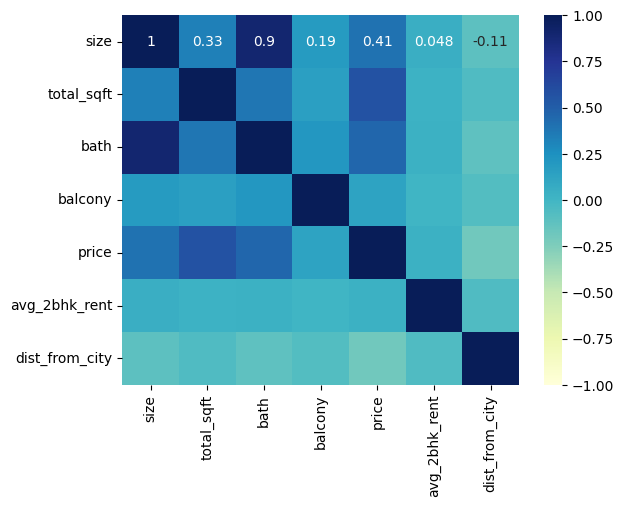

In [ ]:
sns.heatmap(train.corr(numeric_only=True), annot = True, vmin = -1, vmax = 1, cmap = 'YlGnBu')

### Data Cleaning and Preprocessing

#### 1. Checking and Handling Missing Values:
To ensure the dataset is complete and usable for analysis, missing values were assessed and handled systematically. First, the percentage of missing values in both the `train` and `test` datasets was calculated.

- **Columns Dropped Due to Missing Values:**
  - The `avg_2bhk_rent` column was dropped because it had over 65% missing values and showed low correlation with the target variable `price`.
  - The `society` column was also dropped due to high missing values. Imputing this column could distort the data and introduce noise.

- **Imputing Missing Values for Categorical Columns:**
  - For the categorical column `location`, missing values were replaced with the most frequent value (mode) of the column.

- **Imputing Missing Values for Numeric Columns:**
  - **Skewed Numeric Columns:** Columns like `size`, `bath`, `dist_from_city`, and `total_sqft` had missing values replaced with their median values to account for skewed distributions.
  - **Normally Distributed Numeric Columns:** The `balcony` column, which had a relatively normal distribution, had its missing values filled with the mean of the column.

In [ ]:
round(train.isnull().sum() / train.shape[0] * 100, 2)

area_type          0.00
availability       0.00
location           0.01
size               0.13
society           41.55
total_sqft         0.38
bath               0.61
balcony            4.73
price              0.00
avg_2bhk_rent     65.61
dist_from_city     9.63
dtype: float64

In [ ]:
round(test.isnull().sum() / test.shape[0] * 100, 2)

area_type          0.00
availability       0.00
location           0.00
size               0.08
society           40.32
total_sqft         0.23
bath               0.30
balcony            3.94
avg_2bhk_rent     65.77
dist_from_city    10.29
dtype: float64

<Axes: >

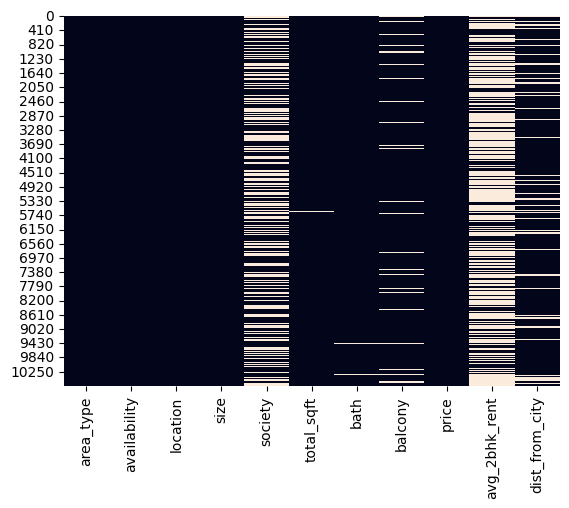

In [ ]:
sns.heatmap(train.isnull(), cbar= False)

In [ ]:
train.drop(columns = ['society', 'avg_2bhk_rent'], inplace = True)
test.drop(columns = ['society', 'avg_2bhk_rent'], inplace = True)

In [ ]:
round(train.isnull().sum() / train.shape[0] * 100, 2)

area_type         0.00
availability      0.00
location          0.01
size              0.13
total_sqft        0.38
bath              0.61
balcony           4.73
price             0.00
dist_from_city    9.63
dtype: float64

In [ ]:
round(test.isnull().sum() / test.shape[0] * 100, 2)

area_type          0.00
availability       0.00
location           0.00
size               0.08
total_sqft         0.23
bath               0.30
balcony            3.94
dist_from_city    10.29
dtype: float64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10642 non-null  float64
 4   total_sqft      10616 non-null  float64
 5   bath            10591 non-null  float64
 6   balcony         10152 non-null  float64
 7   price           10656 non-null  float64
 8   dist_from_city  9630 non-null   float64
dtypes: float64(6), object(3)
memory usage: 749.4+ KB


In [ ]:
#dealing with null values of categorical columns
train['location'].fillna(train['location'].mode()[0], inplace=True)

In [ ]:
#dealing with null values of categorical columns
test['location'].fillna(train['location'].mode()[0], inplace=True)

In [ ]:
train.select_dtypes(include = 'number').skew()

size               5.285649
total_sqft        16.009916
bath               4.568793
balcony            0.001297
price              6.751465
dist_from_city     1.491010
dtype: float64

In [ ]:
#dealing with null values of skewed numeric columns
train['size'].fillna(train['size'].median(), inplace=True)
train['bath'].fillna(train['bath'].median(), inplace=True)
train['dist_from_city'].fillna(train['dist_from_city'].median(), inplace=True)
train['total_sqft'].fillna(train['total_sqft'].median(), inplace=True)

In [ ]:
#dealing with null values of skewed numeric columns
test['size'].fillna(train['size'].median(), inplace=True)
test['bath'].fillna(train['bath'].median(), inplace=True)
test['dist_from_city'].fillna(train['dist_from_city'].median(), inplace=True)
test['total_sqft'].fillna(train['total_sqft'].median(), inplace=True)

In [ ]:
#dealing with null values of normal numeric columns
train['balcony'].fillna(train['balcony'].mean(), inplace=True)

In [ ]:
#dealing with null values of normal numeric columns
test['balcony'].fillna(train['balcony'].mean(), inplace=True)

In [ ]:
round(train.isnull().sum() / train.shape[0] * 100, 2)

area_type         0.0
availability      0.0
location          0.0
size              0.0
total_sqft        0.0
bath              0.0
balcony           0.0
price             0.0
dist_from_city    0.0
dtype: float64

In [ ]:
round(test.isnull().sum() / test.shape[0] * 100, 2)

area_type         0.0
availability      0.0
location          0.0
size              0.0
total_sqft        0.0
bath              0.0
balcony           0.0
dist_from_city    0.0
dtype: float64

<Axes: >

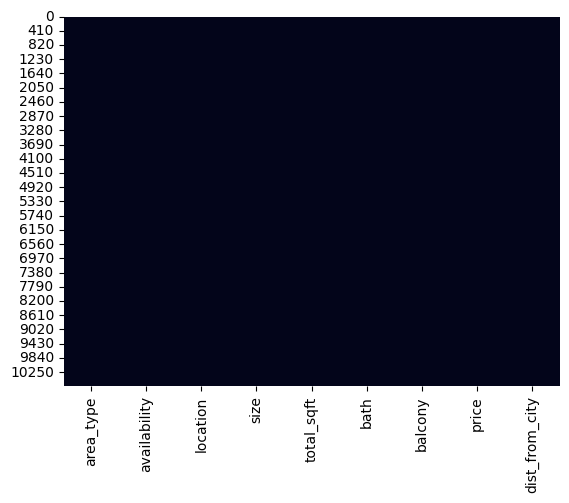

In [ ]:
sns.heatmap(train.isnull(), cbar= False)

#### 2. Removing Duplicates:
The `train` and `test` dataset were checked for duplicate rows. Any duplicate entries were removed to avoid redundancy and ensure the integrity of the analysis.

In [ ]:
train.duplicated().sum()

374

In [ ]:
test.duplicated().sum()

125

In [ ]:
train = train.drop_duplicates(keep='first')

In [ ]:
train.duplicated().sum()

0

#### 3. Handling Outliers:
Outliers were handled using the Interquartile Range (IQR) method to cap extreme values for highly skewed numeric columns. This approach ensures that outliers do not disproportionately affect model performance. The following steps were taken:
  - For each relevant column (`size`, `bath`, `price`, `dist_from_city`, `total_sqft`), the IQR was calculated.
  - Values outside the calculated bounds (1.5 * IQR above the third quartile or below the first quartile) were replaced with the 10th or 90th percentile values, respectively, to limit the influence of extreme values.

This process of handling missing values, duplicates, and outliers ensures that the data is clean, robust, and ready for analysis or model training.

In [ ]:
train.shape

(10282, 9)

In [ ]:
train_num = train.select_dtypes(include=['number'])
train_cat = train.select_dtypes(exclude=['number'])

In [ ]:
train_num.shape

(10282, 6)

In [ ]:
train_cat.shape

(10282, 3)

In [ ]:
test_num = test.select_dtypes(include=['number'])
test_cat = test.select_dtypes(exclude=['number'])

In [ ]:
test_num.shape

(2664, 5)

In [ ]:
test_cat.shape

(2664, 3)

size


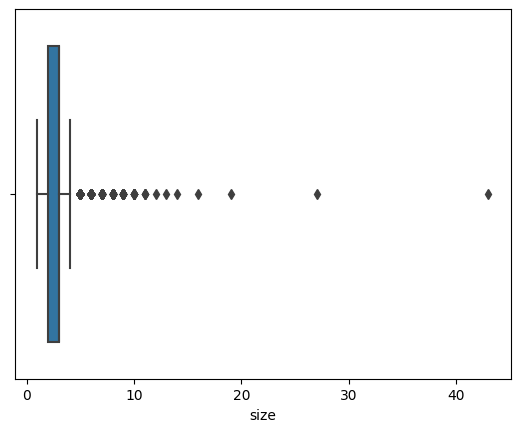

total_sqft


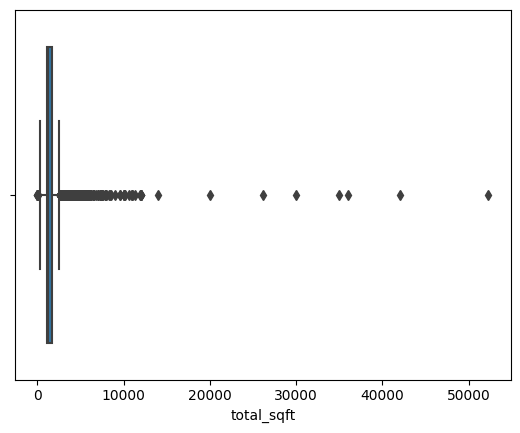

bath


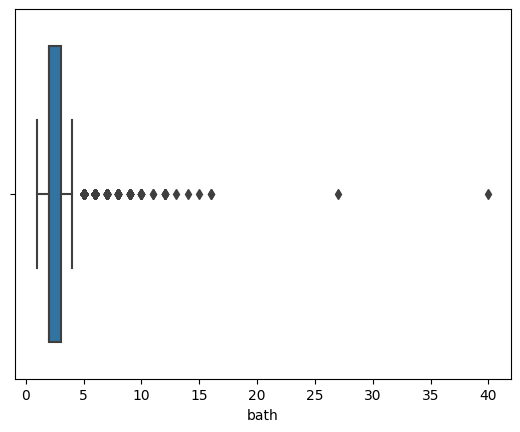

balcony


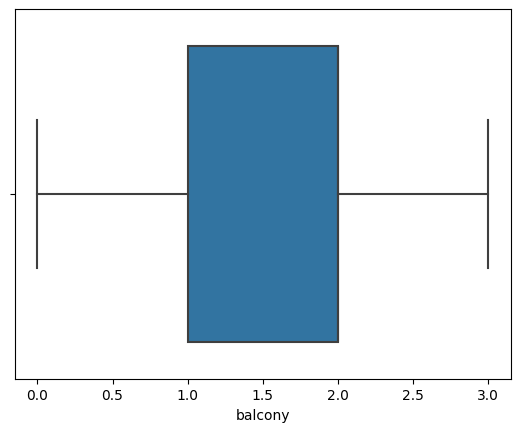

price


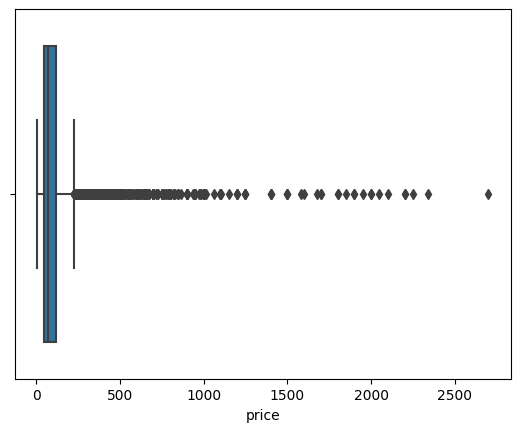

dist_from_city


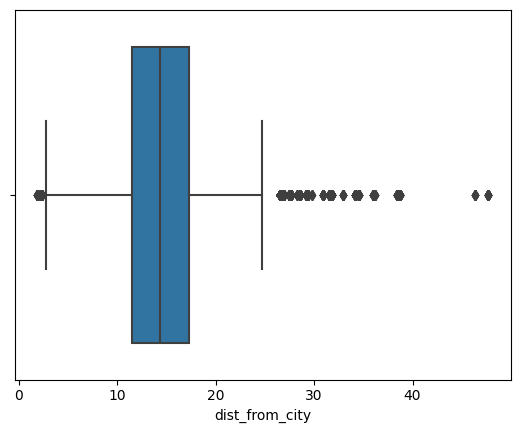

In [ ]:
for col in train_num.columns:
    print(f'{col}')
    sns.boxplot(x=train_num[col])
    plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


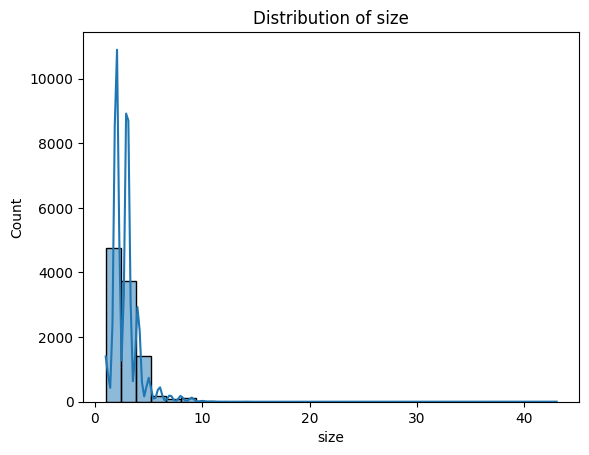

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


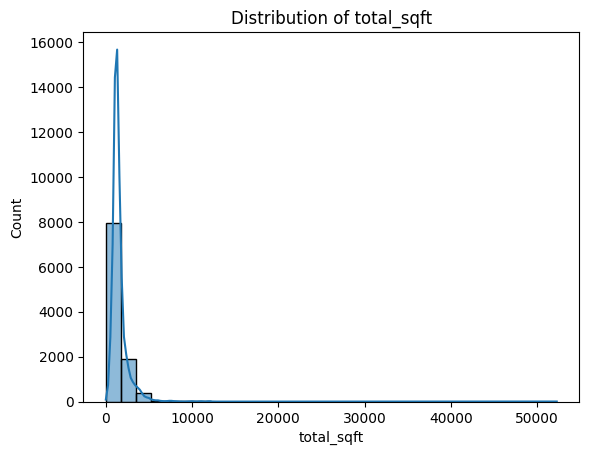

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


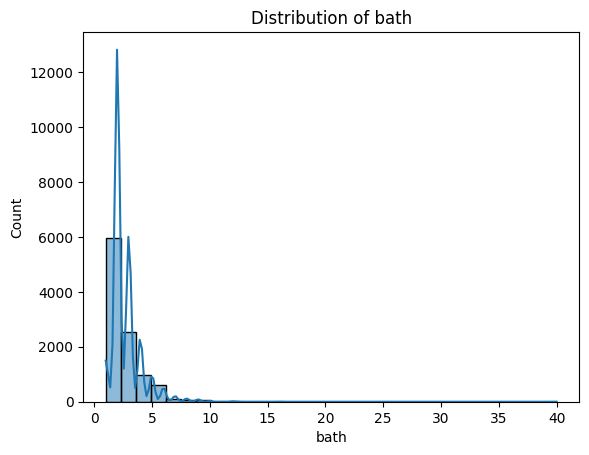

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


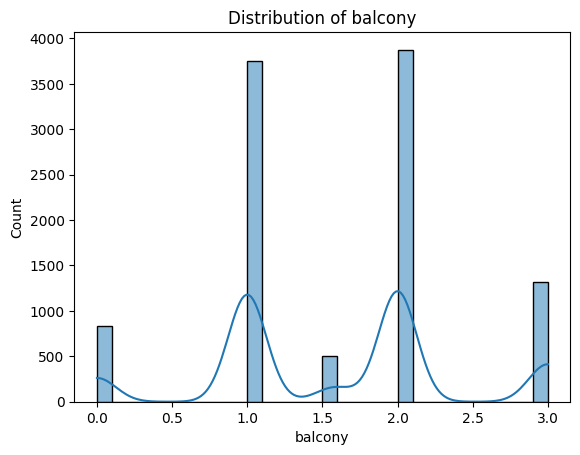

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


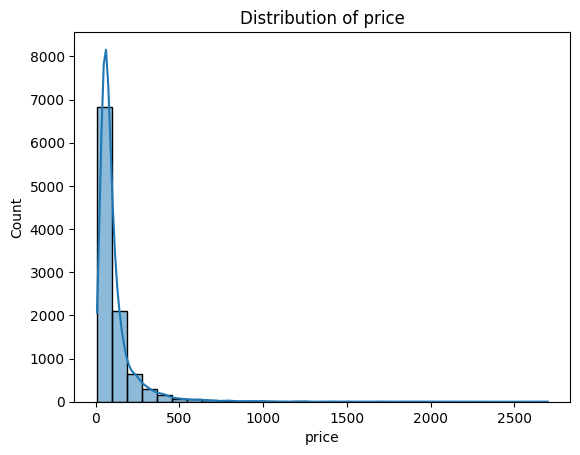

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


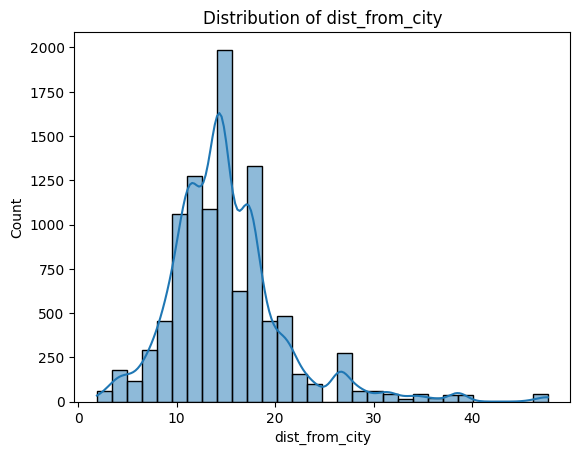

In [ ]:
for col in train_num.columns:
    sns.histplot(train_num[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

- Except balcony, all other columns have outliers

In [ ]:
#iqr capping for highly skewed columns

for col in ['size', 'bath', 'price', 'dist_from_city', 'total_sqft']:
    q1 = train_num[col].quantile(0.25)
    q3 = train_num[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    quantile_10 = train_num[col].quantile(0.10)
    quantile_90 = train_num[col].quantile(0.90)
    train_num[col] = np.where(train_num[col] < lb, quantile_10, train_num[col])
    train_num[col] = np.where(train_num[col] > ub, quantile_90, train_num[col])

size


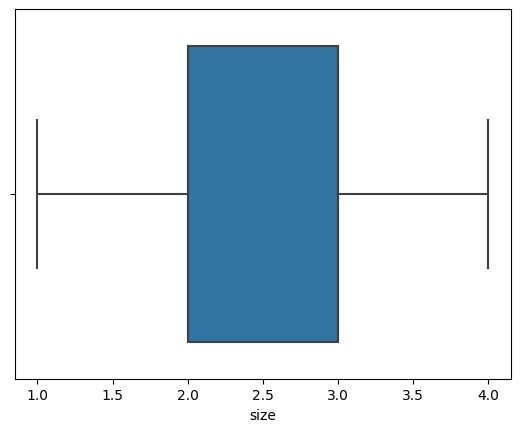

total_sqft


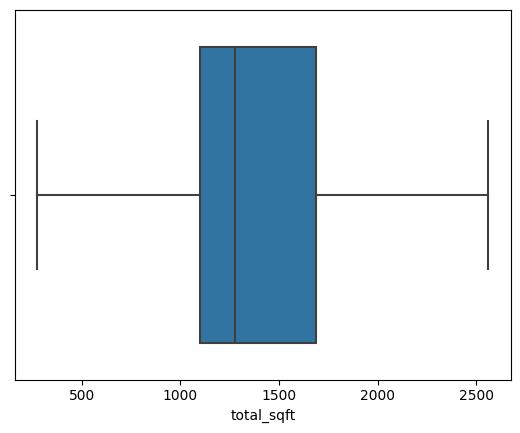

bath


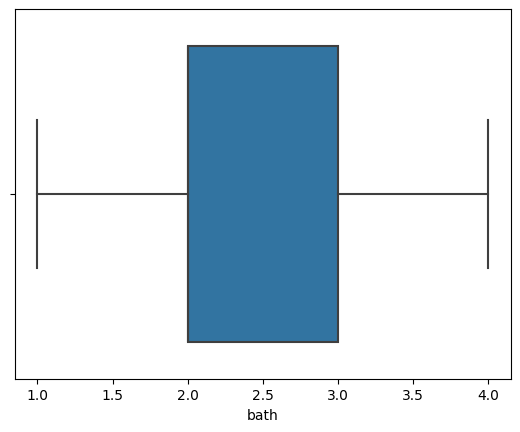

balcony


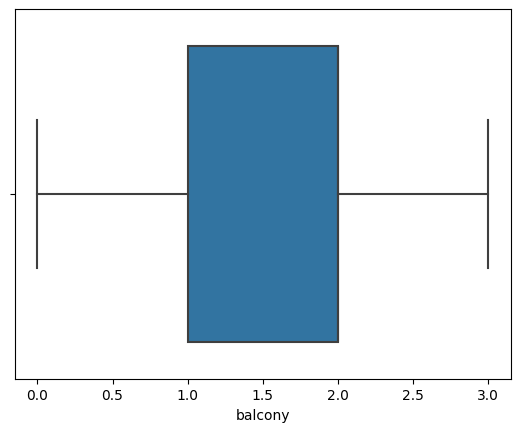

price


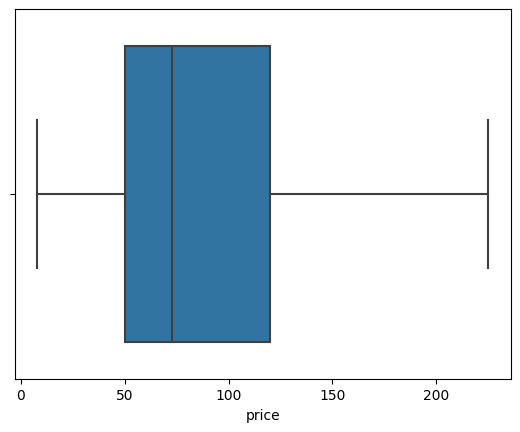

dist_from_city


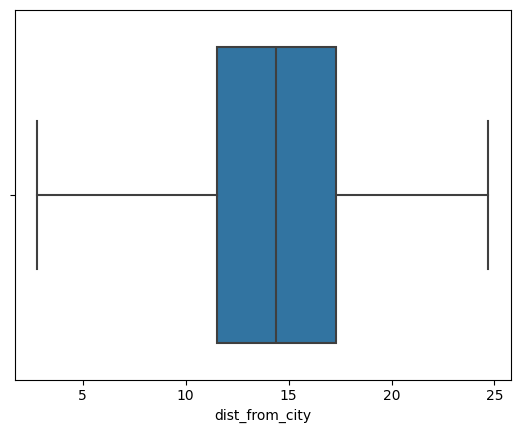

In [ ]:
for col in train_num.columns:
    print(f'{col}')
    sns.boxplot(x=train_num[col])
    plt.show()

### Exploratory Data Analysis

#### 1. Summary Statistics for Numeric Features:
- **`size` (Number of Bedrooms):** Most properties are 2-3 BHK with a mean of 2.66 BHK.
- **`total_sqft` (Total Area):** The average property size is 1425 sq. ft., with a large variation (from 276 sq. ft. to 2560 sq. ft.).
- **`bath` (Number of Bathrooms):** Most properties have 2-3 bathrooms, with a mean of 2.53 bathrooms.
- **`balcony` (Number of Balconies):** The average number of balconies is 1.58, with most properties having 1-2 balconies.
- **`price` (Price of Property):** Prices vary widely, with an average of 94.2 Lakhs and a maximum of 225 Lakhs, indicating a diverse price range.
- **`dist_from_city` (Distance from City Center):** Most properties are within 2.8-24.7 km from the city center, with a mean distance of 14.48 km.

#### 2. Summary Statistics for Categorical Features:
- **`area_type`:** The majority of properties are categorized as "Super built-up Area."
- **`availability`:** Most properties are labeled as "Ready to Move."
- **`location`:** `Whitefield` is the most common location.

#### Insights:
- **Price vs. Size:** There may be a strong correlation between the size of a property and its price.
- **Price vs. Location:** Location likely influences pricing, as more desirable areas may have higher prices.
- **Balcony & Bathrooms:** Properties with more bathrooms and balconies may offer higher living standards and influence pricing.
- **Outliers:** There are potential outliers in terms of price and area, which might need further handling for accurate modeling.

In [ ]:
train_num.describe()

,size,total_sqft,bath,balcony,price,dist_from_city
count,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000
mean,2.661544,1425.004002,2.534429,1.580128,94.203155,14.481920
std,0.821021,516.484149,0.847266,0.806236,60.166708,4.289978
min,1.000000,276.000000,1.000000,0.000000,8.000000,2.800000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000,11.500000
50%,3.000000,1277.500000,2.000000,2.000000,73.000000,14.400000
75%,3.000000,1687.750000,3.000000,2.000000,120.000000,17.300000
max,4.000000,2560.000000,4.000000,3.000000,225.000000,24.700000


In [ ]:
train_cat.describe()

,area_type,availability,location
count,10282,10282,10282
unique,4,79,1197
top,Super built-up Area,Ready To Move,Whitefield
freq,6674,8183,424


#### 1. Distribution of Property Prices:
- **Plot Type:** Histogram with Kernel Density Estimation (KDE)
- **Insights:** The price distribution is right-skewed, with most properties priced lower, and fewer high-priced properties. This suggests that a majority of properties are more affordable, with a few luxury properties pushing the upper price limits.

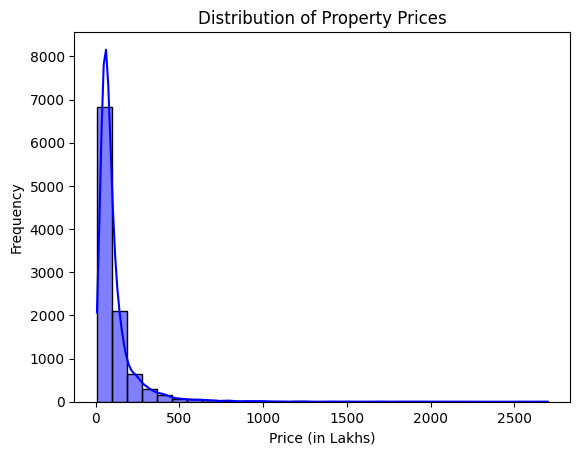

In [ ]:
sns.histplot(train['price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

#### 2. Boxplot of Property Sizes (BHK):
- **Plot Type:** Boxplot
- **Insights:** The distribution of `size` (number of bedrooms) shows that most properties are 2 or 3 BHK. Outliers above 4 BHK indicate larger, more expensive properties.

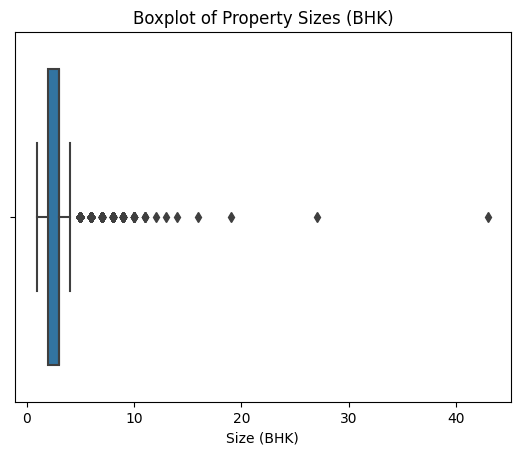

In [ ]:
sns.boxplot(x=train['size'])
plt.title('Boxplot of Property Sizes (BHK)')
plt.xlabel('Size (BHK)')
plt.show()

#### 3. Boxplot of Total Property Area (Sq. Ft.):
- **Plot Type:** Boxplot
- **Insights:** The `total_sqft` feature shows several outliers, indicating properties with unusually large areas. These outliers should be addressed when modeling to avoid their disproportionate influence.

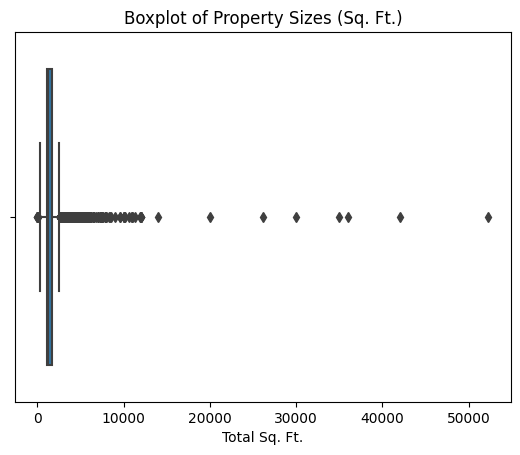

In [ ]:
sns.boxplot(x=train['total_sqft'])
plt.title('Boxplot of Property Sizes (Sq. Ft.)')
plt.xlabel('Total Sq. Ft.')
plt.show()

#### Bivariate Visualization

#### 1. Price vs. Total Area (Sq. Ft.):
- **Plot Type:** Scatter plot
- **Insights:** There is a positive correlation between `total_sqft` and `price`. Larger properties tend to have higher prices, but the relationship is not perfectly linear, indicating other factors (such as location or amenities) also affect price.

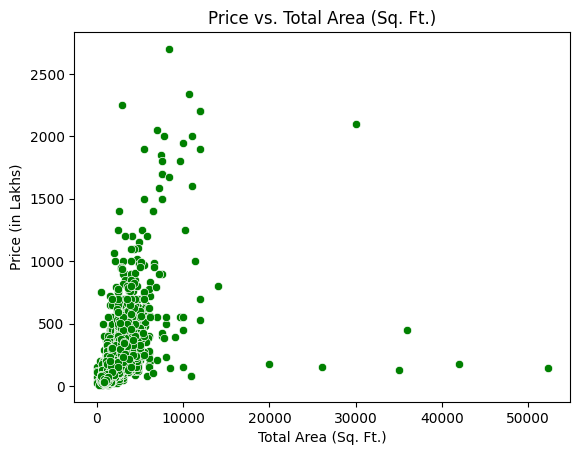

In [ ]:
sns.scatterplot(x='total_sqft', y='price', data=train, color='green')
plt.title('Price vs. Total Area (Sq. Ft.)')
plt.xlabel('Total Area (Sq. Ft.)')
plt.ylabel('Price (in Lakhs)')
plt.show()

#### 2. Price vs. Size (BHK):
- **Plot Type:** Boxplot
- **Insights:** The price increases with the number of bedrooms (BHK). Larger homes tend to be more expensive, with 3 and 4 BHK properties showing higher median prices compared to 1 or 2 BHK.

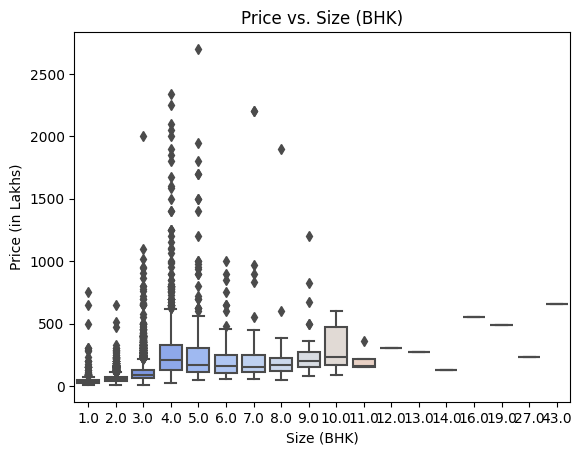

In [ ]:
sns.boxplot(x='size', y='price', data=train, palette='coolwarm')
plt.title('Price vs. Size (BHK)')
plt.xlabel('Size (BHK)')
plt.ylabel('Price (in Lakhs)')
plt.show()

#### 3. Price vs. Distance from City Center:
- **Plot Type:** Scatter plot
- **Insights:** There seems to be a weak negative correlation between `dist_from_city` and `price`. Properties closer to the city center tend to be more expensive, which is typical in urban areas.

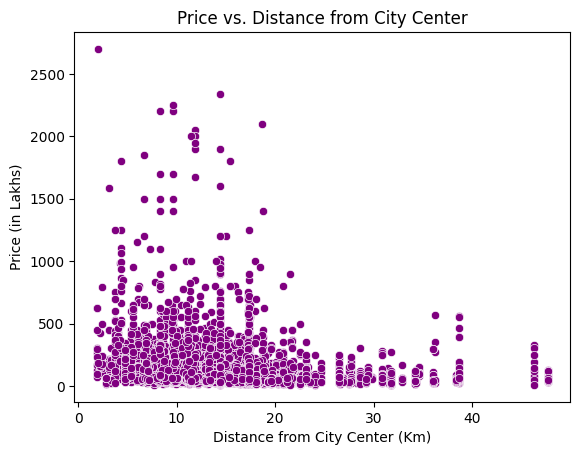

In [ ]:
sns.scatterplot(x='dist_from_city', y='price', data=train, color='purple')
plt.title('Price vs. Distance from City Center')
plt.xlabel('Distance from City Center (Km)')
plt.ylabel('Price (in Lakhs)')
plt.show()

#### Multivariate Visualization

#### 1. Pairplot of Key Variables:
- **Plot Type:** Pairplot
- **Insights:** The pairplot shows the relationships between `price`, `total_sqft`, `size`, `bath`, and `balcony`. There are clear clusters based on the number of bedrooms (`size`), and properties with larger `total_sqft` and more bathrooms tend to be priced higher. This visualization provides insight into how multiple variables interact and affect property price.

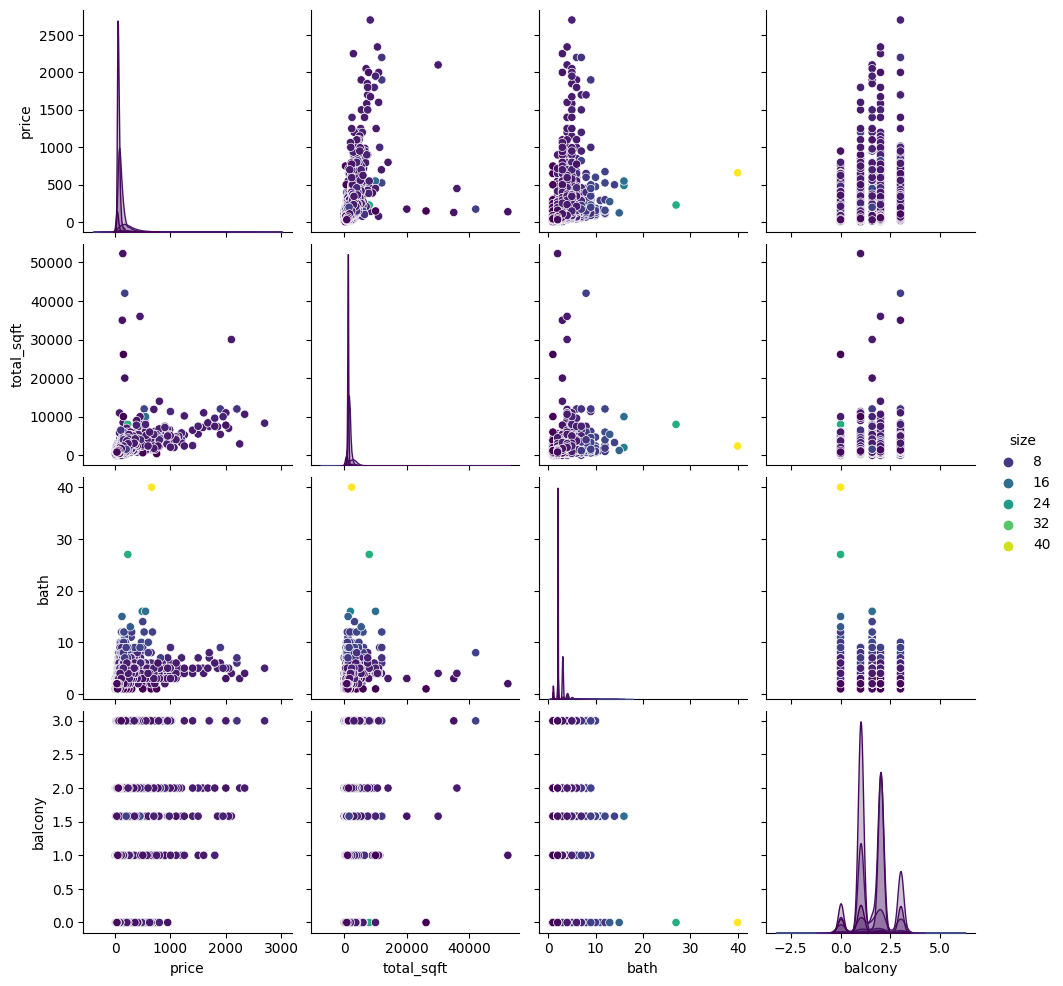

In [ ]:
sns.pairplot(train[['price', 'total_sqft', 'size', 'bath', 'balcony']], hue='size', palette='viridis')
plt.show()

### Data Wrangling

#### 1. Feature Engineering: Handling availability

- **Purpose:** To make the `availability` column more informative and usable for analysis and modeling.
- **Steps Taken:**
  1. **New Column `is_ready_to_move`:** Created a binary column indicating whether a property is "Ready to Move" (1) or not (0). This simplifies analysis for ready-to-move properties.
  2. **Datetime Conversion:** Converted non-"Ready to Move" values into a datetime format to extract month and year.
  3. **Month and Year Extraction:** Extracted `availability_month` and `availability_year` for properties with valid dates.
  4. **Imputation for Missing Values:**
     - For "Ready to Move" properties, set a default value for the month (`12`) and year (`2024`).
     - Imputed remaining missing values for `availability_month` and `availability_year` with the mode of respective columns.

- **Resulting Features:**
  - `is_ready_to_move` (Binary)
  - `availability_year` (Scaled numeric)
  - `availability_month` (Encoded into sine and cosine transformations for cyclic representation)

In [ ]:
train_cat.availability.value_counts()

availability
Ready To Move    8183
18-May            229
18-Dec            225
18-Apr            202
18-Aug            152
                 ... 
14-Nov              1
15-Aug              1
17-Jan              1
16-Nov              1
20-Apr              1
Name: count, Length: 79, dtype: int64

In [ ]:
# Create a new column indicating whether the property is ready to move
train_cat['is_ready_to_move'] = (train_cat['availability'] == 'Ready To Move').astype(int)
test_cat['is_ready_to_move'] = (test_cat['availability'] == 'Ready To Move').astype(int)

In [ ]:
# Convert to datetime format for non "Ready To Move" values
train_cat['availability'] = pd.to_datetime(train_cat['availability'], errors='coerce', format='%y-%b')
test_cat['availability'] = pd.to_datetime(test_cat['availability'], errors='coerce', format='%y-%b')

# Extract month and year from valid dates
train_cat['availability_month'] = train_cat['availability'].dt.month
train_cat['availability_year'] = train_cat['availability'].dt.year

test_cat['availability_month'] = test_cat['availability'].dt.month
test_cat['availability_year'] = test_cat['availability'].dt.year

In [ ]:
# Impute "Ready To Move" properties with a default month/year (e.g., January of the current year)
train_cat.loc[train_cat['is_ready_to_move'] == 1, 'availability_month'] = 12
train_cat.loc[train_cat['is_ready_to_move'] == 1, 'availability_year'] = 2024  # Current year

test_cat.loc[test_cat['is_ready_to_move'] == 1, 'availability_month'] = 12
test_cat.loc[test_cat['is_ready_to_move'] == 1, 'availability_year'] = 2024  # Current year

In [ ]:
# Leave 'availability_month' and 'availability_year' as NaN for "Ready To Move"
# Handle missing values based on the 'is_ready_to_move' column in your model

train_cat['availability_month'].fillna(train_cat['availability_month'].mode()[0], inplace=True)
train_cat['availability_year'].fillna(train_cat['availability_year'].mode()[0], inplace=True)

test_cat['availability_month'].fillna(train_cat['availability_month'].mode()[0], inplace=True)
test_cat['availability_year'].fillna(train_cat['availability_year'].mode()[0], inplace=True)

In [ ]:
train_cat.drop(columns=['availability'], inplace=True)
test_cat.drop(columns=['availability'], inplace=True)

In [ ]:
train_cat.head()

,area_type,location,is_ready_to_move,availability_month,availability_year
0,Super built-up Area,Electronic City Phase II,0,12.0,2019.0
1,Plot Area,Chikka Tirupathi,1,12.0,2024.0
2,Built-up Area,Uttarahalli,1,12.0,2024.0
3,Super built-up Area,Lingadheeranahalli,1,12.0,2024.0
4,Super built-up Area,Kothanur,1,12.0,2024.0


In [ ]:
test_cat.head()

,area_type,location,is_ready_to_move,availability_month,availability_year
0,Super built-up Area,Chamrajpet,1,12.0,2024.0
1,Super built-up Area,7th Phase JP Nagar,1,12.0,2024.0
2,Super built-up Area,Whitefield,1,12.0,2024.0
3,Built-up Area,Jalahalli,1,12.0,2024.0
4,Plot Area,TC Palaya,1,12.0,2024.0


In [ ]:
train_cat.describe(include = 'object')

,area_type,location
count,10282,10282
unique,4,1197
top,Super built-up Area,Whitefield
freq,6674,424


In [ ]:
train_cat.area_type.value_counts()

area_type
Super built-up  Area    6674
Built-up  Area          1914
Plot  Area              1625
Carpet  Area              69
Name: count, dtype: int64

#### 2. Encoding Categorical Variables

- **Encoding `area_type`:** Used one-hot encoding for the `area_type` column, dropping the first category to avoid multicollinearity.
- **Target Encoding for `location`:**
  - Calculated the mean target price for each location and used a smoothing formula to encode locations, giving weight to both the global mean price and location-specific mean price.
  - Log-transformed and scaled the encoded values for normalization.
  - Dropped the original `location` column after encoding.

- **Purpose:** These transformations make categorical features numerical while preserving the relationship between location and property price.

In [ ]:
train_cat = pd.get_dummies(train_cat, columns=['area_type'], drop_first=True, dtype=int)  # drop_first to avoid multicollinearity
test_cat = pd.get_dummies(test_cat, columns=['area_type'], drop_first=True, dtype=int)

In [ ]:
train_cat.location.value_counts()

location
Whitefield                424
Sarjapur  Road            290
Electronic City           225
Kanakpura Road            196
Thanisandra               176
                         ... 
Sahyadri Layout             1
Laxminarayana Layout        1
Kanakadasa Layout           1
Indira Nagar 3rd Stage      1
Panathur Road,              1
Name: count, Length: 1197, dtype: int64

In [ ]:
train_com = pd.concat([train_num, train_cat], axis=1)

In [ ]:
# Calculate the mean target value for each location
mean_price = train_com['price'].mean()
location_means = train_com.groupby('location')['price'].mean()

# Calculate the number of occurrences of each category (location)
location_counts = train_cat['location'].value_counts()

# Apply smoothing: Use the formula to give more weight to the global mean
smooth_factor = 10  # Adjust based on the data size
train_cat['location_encoded'] = train_cat['location'].map(lambda x: (location_means[x] * location_counts[x] + mean_price * smooth_factor) / (location_counts[x] + smooth_factor))

# Apply the same encoding to the test set
test_cat['location_encoded'] = test_cat['location'].map(lambda x: (location_means.get(x, mean_price) * location_counts.get(x, 0) + mean_price * smooth_factor) / (location_counts.get(x, 0) + smooth_factor))

In [ ]:
train_cat.head()

,location,is_ready_to_move,availability_month,availability_year,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_encoded
0,Electronic City Phase II,0,12.0,2019.0,0,0,1,51.039260
1,Chikka Tirupathi,1,12.0,2024.0,0,1,0,104.187024
2,Uttarahalli,1,12.0,2024.0,0,0,0,64.728962
3,Lingadheeranahalli,1,12.0,2024.0,0,0,1,105.954698
4,Kothanur,1,12.0,2024.0,0,0,1,95.021350


In [ ]:
test_cat.head()

,location,is_ready_to_move,availability_month,availability_year,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_encoded
0,Chamrajpet,1,12.0,2024.0,0,0,1,128.378169
1,7th Phase JP Nagar,1,12.0,2024.0,0,0,1,97.319372
2,Whitefield,1,12.0,2024.0,0,0,1,102.678851
3,Jalahalli,1,12.0,2024.0,0,0,0,94.928785
4,TC Palaya,1,12.0,2024.0,0,1,0,85.783295


In [ ]:
train_cat.drop(columns=['location'], inplace=True)
test_cat.drop(columns=['location'], inplace=True)

#### 3. Transformations for Numeric Columns

- **Log Transformation:** Applied `log1p` transformation to `total_sqft`, `price`, and `location_encoded` to reduce skewness in the data and make distributions more normal.
- **Cyclic Encoding for `availability_month`:** Represented the month cyclically using sine and cosine transformations, as months are inherently cyclic.

- **Purpose:** These transformations improve model performance by ensuring numeric features are normally distributed and by handling cyclic patterns appropriately.

In [ ]:
train_num.head()

,size,total_sqft,bath,balcony,price,dist_from_city
0,2.0,1056.0,2.0,1.0,39.07,19.3
1,4.0,2461.9,4.0,3.0,120.00,21.4
2,3.0,1440.0,2.0,3.0,62.00,12.9
3,3.0,1521.0,3.0,1.0,95.00,21.4
4,2.0,1200.0,2.0,1.0,51.00,11.8


In [ ]:
train_num.skew()

size              0.142617
total_sqft        0.678879
bath              0.454070
balcony           0.005622
price             1.078211
dist_from_city   -0.030401
dtype: float64

In [ ]:
(np.log1p(train_num['total_sqft'])).skew()

-0.28873859211662767

In [ ]:
(np.log1p(test_num['total_sqft'])).skew()

0.704384032334502

In [ ]:
train_num['total_sqft'] = (np.log1p(train_num['total_sqft']))
test_num['total_sqft'] = (np.log1p(test_num['total_sqft']))

In [ ]:
(np.log1p(train_num['price'])).skew()

0.11181608869095108

In [ ]:
train_num['price'] = np.log1p(train_num['price'])

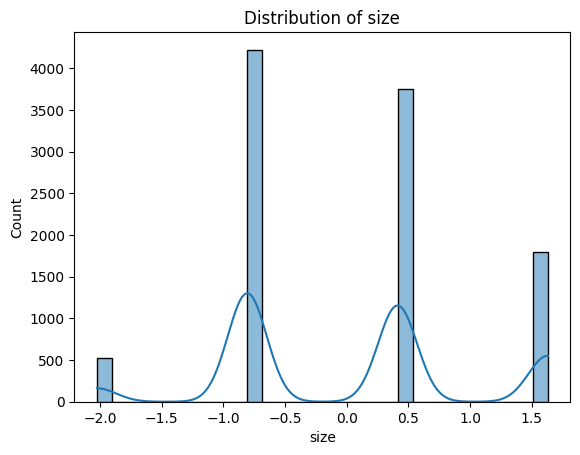

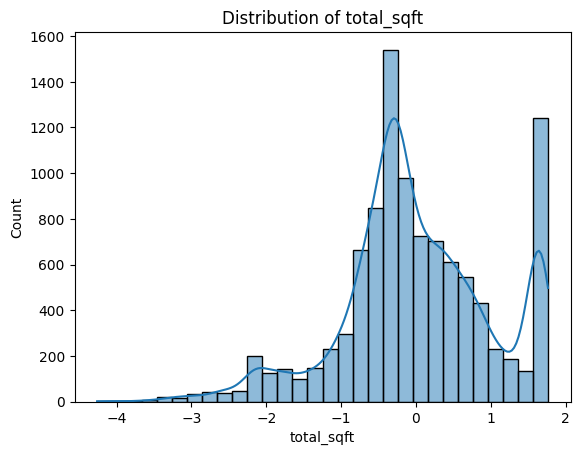

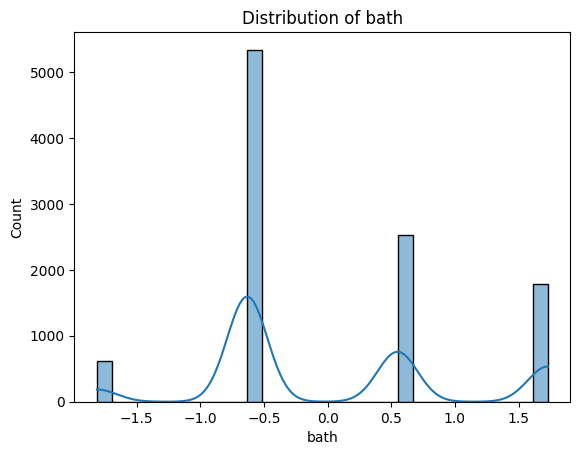

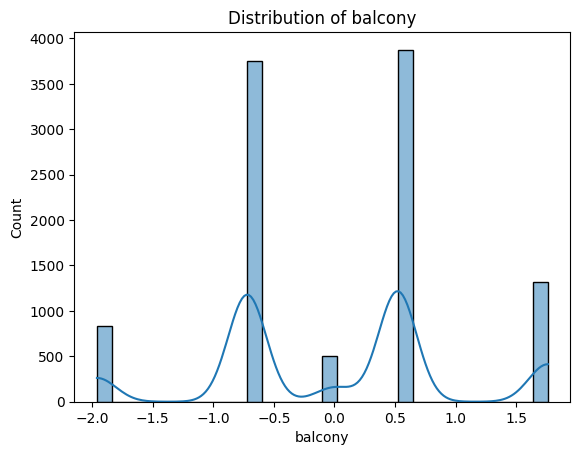

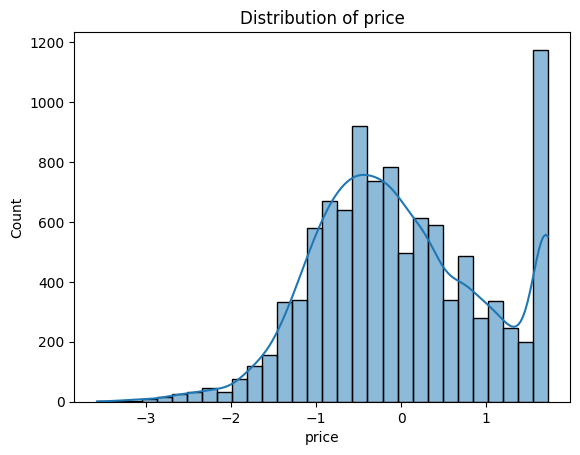

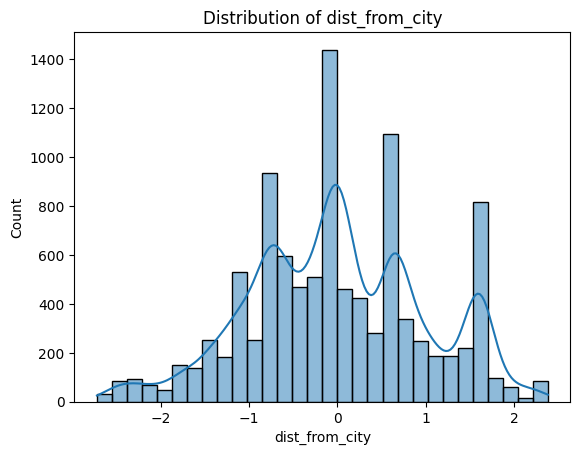

In [ ]:
for col in train_num.columns:
    sns.histplot(train_num[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

#### 4. Scaling

- **Standard Scaling:** Used `StandardScaler` to standardize numeric columns (`size`, `total_sqft`, `bath`, `balcony`, `dist_from_city`, `price`, and `location_encoded`) to have a mean of 0 and a standard deviation of 1.
- **Purpose:** Scaling ensures all features have comparable magnitudes, which is crucial for distance-based algorithms and faster convergence in gradient-based models.

In [ ]:
train_num.skew()

size              0.142617
total_sqft       -0.288739
bath              0.454070
balcony           0.005622
price             0.111816
dist_from_city   -0.030401
dtype: float64

In [ ]:
train_num1 = train_num.copy()

In [ ]:
train_num.head()

,size,total_sqft,bath,balcony,price,dist_from_city
0,2.0,6.963190,2.0,1.0,3.690628,19.3
1,4.0,7.809095,4.0,3.0,4.795791,21.4
2,3.0,7.273093,2.0,3.0,4.143135,12.9
3,3.0,7.327781,3.0,1.0,4.564348,21.4
4,2.0,7.090910,2.0,1.0,3.951244,11.8


In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
train_num[['size', 'total_sqft', 'bath', 'balcony', 'dist_from_city']] = s.fit_transform(train_num[['size', 'total_sqft', 'bath', 'balcony', 'dist_from_city']])
test_num[['size', 'total_sqft', 'bath', 'balcony', 'dist_from_city']] = s.transform(test_num[['size', 'total_sqft', 'bath', 'balcony', 'dist_from_city']])

price_scaler = StandardScaler()
train_num[['price']] = price_scaler.fit_transform(train_num[['price']])

In [ ]:
train_num.head()

,size,total_sqft,bath,balcony,price,dist_from_city
0,-0.805797,-0.632607,-0.630800,-0.719586,-1.119250,1.123156
1,1.630312,1.658846,1.729849,1.761197,0.698919,1.612693
2,0.412257,0.206881,-0.630800,1.761197,-0.374804,-0.368766
3,0.412257,0.355024,0.549525,-0.719586,0.318159,1.612693
4,-0.805797,-0.286630,-0.630800,-0.719586,-0.690496,-0.625190


In [ ]:
test_num.head()

,size,total_sqft,bath,balcony,dist_from_city
0,-0.805797,-1.945547,-1.811124,-0.719586,-1.814065
1,0.412257,0.071987,-0.630800,-0.719586,-0.811680
2,0.412257,0.695750,0.549525,0.520805,0.656930
3,-0.805797,-0.780065,-0.630800,-1.959977,0.493752
4,-2.023852,0.032180,-1.811124,-1.959977,-0.531945


In [ ]:
train_cat.head()

,is_ready_to_move,availability_month,availability_year,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_encoded
0,0,12.0,2019.0,0,0,1,51.039260
1,1,12.0,2024.0,0,1,0,104.187024
2,1,12.0,2024.0,0,0,0,64.728962
3,1,12.0,2024.0,0,0,1,105.954698
4,1,12.0,2024.0,0,0,1,95.021350


In [ ]:
train_cat.location_encoded.skew()

0.8471167262977608

In [ ]:
(np.log1p(train_cat['location_encoded'])).skew()

-0.07396421923717343

In [ ]:
train_cat['location_encoded'] = np.log1p(train_cat['location_encoded'])
test_cat['location_encoded'] = np.log1p(test_cat['location_encoded'])

In [ ]:
# Then scale the data using StandardScaler
scaler = StandardScaler()
train_cat['location_encoded'] = scaler.fit_transform(train_cat[['location_encoded']])
test_cat['location_encoded'] = scaler.transform(test_cat[['location_encoded']])

In [ ]:
train_cat['availability_month_sin'] = np.sin(2 * np.pi * train_cat['availability_month'] / 12)
train_cat['availability_month_cos'] = np.cos(2 * np.pi * train_cat['availability_month'] / 12)

# Drop the original month column
train_cat.drop(columns=['availability_month'], inplace=True)

In [ ]:
test_cat['availability_month_sin'] = np.sin(2 * np.pi * test_cat['availability_month'] / 12)
test_cat['availability_month_cos'] = np.cos(2 * np.pi * test_cat['availability_month'] / 12)

# Drop the original month column
test_cat.drop(columns=['availability_month'], inplace=True)

In [ ]:
train_cat.availability_year.describe()

count    10282.000000
mean      2022.887376
std          2.261685
min       2014.000000
25%       2024.000000
50%       2024.000000
75%       2024.000000
max       2024.000000
Name: availability_year, dtype: float64

In [ ]:
# Then scale the data using StandardScaler
scaler = StandardScaler()
train_cat['availability_year'] = scaler.fit_transform(train_cat[['availability_year']])
test_cat['availability_year'] = scaler.transform(test_cat[['availability_year']])

In [ ]:
train_cat.head()

,is_ready_to_move,availability_year,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_encoded,availability_month_sin,availability_month_cos
0,0,-1.718880,0,0,1,-2.298610,-2.449294e-16,1.0
1,1,0.491969,0,1,0,0.605582,-2.449294e-16,1.0
2,1,0.491969,0,0,0,-1.334835,-2.449294e-16,1.0
3,1,0.491969,0,0,1,0.674357,-2.449294e-16,1.0
4,1,0.491969,0,0,1,0.229346,-2.449294e-16,1.0


In [ ]:
test_cat.head()

,is_ready_to_move,availability_year,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_encoded,availability_month_sin,availability_month_cos
0,1,0.491969,0,0,1,1.459827,-2.449294e-16,1.0
1,1,0.491969,0,0,1,0.326946,-2.449294e-16,1.0
2,1,0.491969,0,0,1,0.545984,-2.449294e-16,1.0
3,1,0.491969,0,0,0,0.225365,-2.449294e-16,1.0
4,1,0.491969,0,1,0,-0.188106,-2.449294e-16,1.0


In [ ]:
train_num.head()

,size,total_sqft,bath,balcony,price,dist_from_city
0,-0.805797,-0.632607,-0.630800,-0.719586,-1.119250,1.123156
1,1.630312,1.658846,1.729849,1.761197,0.698919,1.612693
2,0.412257,0.206881,-0.630800,1.761197,-0.374804,-0.368766
3,0.412257,0.355024,0.549525,-0.719586,0.318159,1.612693
4,-0.805797,-0.286630,-0.630800,-0.719586,-0.690496,-0.625190


In [ ]:
test_num.head()

,size,total_sqft,bath,balcony,dist_from_city
0,-0.805797,-1.945547,-1.811124,-0.719586,-1.814065
1,0.412257,0.071987,-0.630800,-0.719586,-0.811680
2,0.412257,0.695750,0.549525,0.520805,0.656930
3,-0.805797,-0.780065,-0.630800,-1.959977,0.493752
4,-2.023852,0.032180,-1.811124,-1.959977,-0.531945


#### 5. Combining Datasets

- **Merged Transformed Data:** Combined the processed numeric (`train_num`, `test_num`) and categorical (`train_cat`, `test_cat`) datasets into final training and test datasets.
- **Purpose:** This step prepares the data for model training and ensures all features are clean, consistent, and ready for use.

In [ ]:
tot_train = pd.concat([train_num, train_cat], axis=1)
tot_test = pd.concat([test_num, test_cat], axis=1)

### Cross validation

- Cross-validation (CV) is a statistical technique used to evaluate a model’s performance by splitting the dataset into multiple training and validation sets.
- It helps reduce overfitting by testing the model on unseen data during training.
- Commonly used metric: Root Mean Squared Error (RMSE), which quantifies prediction errors in the same unit as the target variable.

**Steps:**
1. **Splitting Data:** Used `x_train` (features) and `y_train` (target) for model evaluation.
2. **Metric Calculation:** Negative Mean Squared Error (MSE) is computed for each split, converted to RMSE for interpretability.
3. **Mean RMSE:** The average of RMSE scores from all splits is calculated to assess overall model performance.

In [ ]:
tot_train.head()

,size,total_sqft,bath,balcony,price,dist_from_city,is_ready_to_move,availability_year,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_encoded,availability_month_sin,availability_month_cos
0,-0.805797,-0.632607,-0.630800,-0.719586,-1.119250,1.123156,0,-1.718880,0,0,1,-2.298610,-2.449294e-16,1.0
1,1.630312,1.658846,1.729849,1.761197,0.698919,1.612693,1,0.491969,0,1,0,0.605582,-2.449294e-16,1.0
2,0.412257,0.206881,-0.630800,1.761197,-0.374804,-0.368766,1,0.491969,0,0,0,-1.334835,-2.449294e-16,1.0
3,0.412257,0.355024,0.549525,-0.719586,0.318159,1.612693,1,0.491969,0,0,1,0.674357,-2.449294e-16,1.0
4,-0.805797,-0.286630,-0.630800,-0.719586,-0.690496,-0.625190,1,0.491969,0,0,1,0.229346,-2.449294e-16,1.0


In [ ]:
x_train = tot_train.drop(columns=['price'])
y_train = tot_train['price']

1. **Linear Regression:** A simple regression model that assumes a linear relationship between input features and the target variable.
   - Pro: Interpretable and quick to train.
   - Con: Limited flexibility for non-linear patterns.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

scores = cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'Linear Regression RMSE: {rmse_scores.mean()}')

Linear Regression RMSE: 0.47575315630375065


2. **Decision Tree Regressor:** A tree-based model that recursively splits data into subgroups based on feature values.
   - Pro: Captures non-linear relationships well.
   - Con: Prone to overfitting without regularization.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize model
dt = DecisionTreeRegressor(random_state=42)

# Cross-validation
scores = cross_val_score(dt, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'Decision Tree RMSE: {rmse_scores.mean()}')

Decision Tree RMSE: 0.5468622143091247


3. **Random Forest Regressor:** An ensemble method that combines multiple decision trees using bagging to reduce overfitting.
   - Pro: Robust and accurate.
   - Con: Computationally intensive.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'Random Forest RMSE: {rmse_scores.mean()}')

Random Forest RMSE: 0.41005466220609976


4. **Gradient Boosting Regressor:** Builds models sequentially, correcting errors of the previous models.
   - Pro: High accuracy and handles complex relationships.
   - Con: Slower training compared to Random Forest.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(gb, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'Gradient Boosting RMSE: {rmse_scores.mean()}')

Gradient Boosting RMSE: 0.4303863342492772


5. **XGBoost Regressor:** An optimized gradient boosting method that uses regularization techniques.
   - Pro: Fast, accurate, and highly efficient.
   - Con: Requires careful tuning.

In [ ]:
import xgboost as xgb

# Initialize model
xg_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(xg_reg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'XGBoost RMSE: {rmse_scores.mean()}')

XGBoost RMSE: 0.40752480239745664


6. **Lasso Regression:** A linear model with L1 regularization to shrink less important coefficients to zero.
   - Pro: Feature selection capability.
   - Con: May underperform if all features are relevant.

In [ ]:
from sklearn.linear_model import Lasso

# Initialize model
lasso = Lasso()

# Cross-validation
scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'Lasso Regression RMSE: {rmse_scores.mean()}')

Lasso Regression RMSE: 1.0000191986973304


7. **Ridge Regression:** A linear model with L2 regularization to penalize large coefficients.
   - Pro: Reduces overfitting by balancing coefficients.
   - Con: Does not perform feature selection.

In [ ]:
from sklearn.linear_model import Ridge

# Initialize model
ridge = Ridge()

# Cross-validation
scores = cross_val_score(ridge, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'Ridge Regression RMSE: {rmse_scores.mean()}')

Ridge Regression RMSE: 0.475749828744321


8. **Support Vector Regression (SVR):** A regression model that finds a hyperplane to fit the data within a margin.
   - Pro: Effective for small and high-dimensional datasets.
   - Con: Sensitive to hyperparameter tuning.

In [ ]:
from sklearn.svm import SVR

# Initialize model
svr = SVR()

# Cross-validation
scores = cross_val_score(svr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print(f'Support Vector Regression RMSE: {rmse_scores.mean()}')

Support Vector Regression RMSE: 0.43508174060515825


In [ ]:
tot_test.head()

,size,total_sqft,bath,balcony,dist_from_city,is_ready_to_move,availability_year,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_encoded,availability_month_sin,availability_month_cos
0,-0.805797,-1.945547,-1.811124,-0.719586,-1.814065,1,0.491969,0,0,1,1.459827,-2.449294e-16,1.0
1,0.412257,0.071987,-0.630800,-0.719586,-0.811680,1,0.491969,0,0,1,0.326946,-2.449294e-16,1.0
2,0.412257,0.695750,0.549525,0.520805,0.656930,1,0.491969,0,0,1,0.545984,-2.449294e-16,1.0
3,-0.805797,-0.780065,-0.630800,-1.959977,0.493752,1,0.491969,0,0,0,0.225365,-2.449294e-16,1.0
4,-2.023852,0.032180,-1.811124,-1.959977,-0.531945,1,0.491969,0,1,0,-0.188106,-2.449294e-16,1.0


### Model Building and Final Prediction

#### 1. Model Selection
Based on cross-validation results, Random Forest, XGBoost, and Linear Regression demonstrated strong performance. Random Forest was chosen for final model building due to its robust performance, ability to handle non-linearity, and feature importance analysis.


#### 2. Validation Split
- A train-validation split (80-20) was used to assess the model’s generalization ability before retraining on the full dataset.
- **Purpose:** This step ensures the model is evaluated on unseen data before making predictions on the test set


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### 3. Model Training and Validation
- The Random Forest Regressor was trained on the training split.
- Validation predictions were made, and the Root Mean Squared Error (RMSE) was calculated to assess performance.
- Low RMSE on the validation set indicates the model’s readiness for final training and predictio.


In [ ]:
# Train model on the training split
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_split, y_train_split)

# Evaluate model on the validation set
val_predictions = rf.predict(x_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 0.4046977693697062


In [ ]:
test = pd.read_csv('test.csv')

#### 4. Final Model Training
- The Random Forest model was retrained on the entire training dataset (`x_train` and `y_train`) to leverage all available data.
- **Purpose:** Maximize the data utilized for final predictions to improve accuracy

#### 5. Test Set Predictions
- Predictions were generated for the test set.
- Reverse transformations were applied:
  1. **Reverse Scaling:** The scaled predictions were transformed back to the original scale using the inverse of the `StandardScaler` fitted on the training target (`y_train`).
  2. **Reverse Log1p Transformation:** The logarithmic transformation applied to `price` during preprocessing was reversed using `expm1`.
- Predictions were saved in their original scale for interpretability.



In [ ]:
# Retrain model on the entire training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)  # Train on the whole training dataset

# Now make predictions on the test set
test_predictions = rf.predict(tot_test)

# Reverse scaling: assuming 'scaler' was fitted on y_train
predictions_scaled = price_scaler.inverse_transform(test_predictions.reshape(-1, 1))

# Reverse log1p transformation: convert predictions back to the original target scale
test_predictions_original_scale = np.expm1(predictions_scaled)

# Save predictions to a CSV file
output = pd.DataFrame({'ID': test['ID'], 'price': test_predictions_original_scale.flatten()})
output.to_csv('19predictions.csv', index=False)

In [ ]:
output.head()

,ID,price
0,0,65.551480
1,1,62.887270
2,2,104.199162
3,3,48.186679
4,4,78.911471


#### **Model Score and RMSE on Training Data**
- **R² Score (Training Data):** 0.975  
  - This indicates that the model explains 97.5% of the variance in the training data, showing a very strong fit.  
- **RMSE (Training Data):** 0.158  
  - The low RMSE value suggests that the model's predictions are very close to the actual values in the training set.

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate model score (R²)
train_score = rf.score(x_train, y_train)
print(f"Model Score (R²) on Training Data: {train_score}")

train_predictions = rf.predict(x_train)

# Calculate RMSE on the training data
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print(f"RMSE on Training Data: {train_rmse}")

Model Score (R²) on Training Data: 0.975058193109662
RMSE on Training Data: 0.15792975302436837


#### **Hackathon Test Data Performance**
- The model achieved a **low RMSE of 96** on the test data when predictions were submitted to the hackathon.  
- This indicates that the model performs well on unseen data, validating its generalizability and robustness.

#### **Conclusions**
1. The **Random Forest Regressor** demonstrates excellent performance on the training dataset with high accuracy **(R² = 0.975)** and a low prediction error **(RMSE = 0.158)**.
2. The model is effectively capturing the relationships in the data, with minimal error in predictions.
3. The high training score suggests a strong fit, but it is crucial to ensure the model's performance generalizes well to unseen data (test/validation sets) to confirm it is not overfitting.

#### **Final Inference**
- The Random Forest model is a robust choice for predicting property prices based on the provided features.  
- If validation and test scores align with training performance, the model can be confidently deployed for real-world predictions.  
- Further optimization, such as hyperparameter tuning, could potentially improve the model's performance.